# House Price Prediction

# Objective:

### Predict house prices based on property features such as area, bedrooms, bathrooms, floors, year built, location, condition, and garage availability.

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

## 2. Load dataset

In [2]:
df = pd.read_csv("House Price Prediction Dataset.csv")

## 3. Explore dataset

In [3]:
print(df.head())
print(df.info())
print(df.describe())

   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Locat

## 4. Handle categorical variables

In [5]:
categorical_cols = ['Location', 'Condition', 'Garage']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

## 5. Feature selection

In [6]:
X = df.drop(['Id', 'Price'], axis=1)
y = df['Price']

### Scale features

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 6. Split dataset

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 7. Train regression model

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

## 8. Visualize predictions vs actual

### Scatter plot

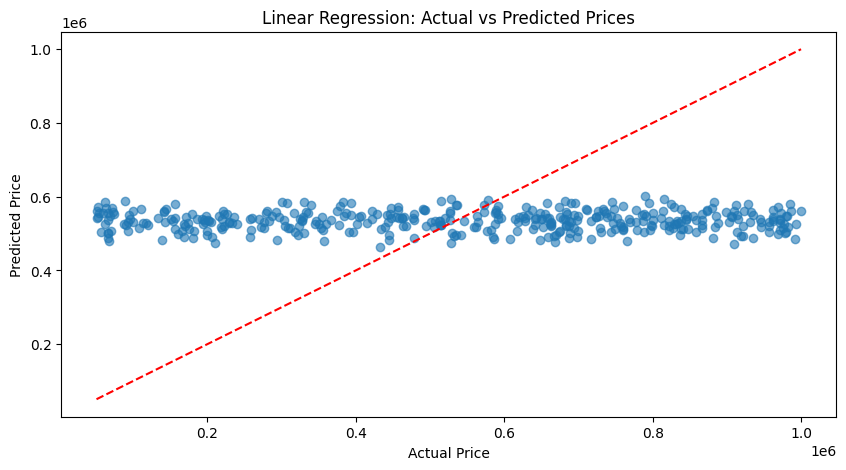

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted Prices")
plt.show()

### Residual plot

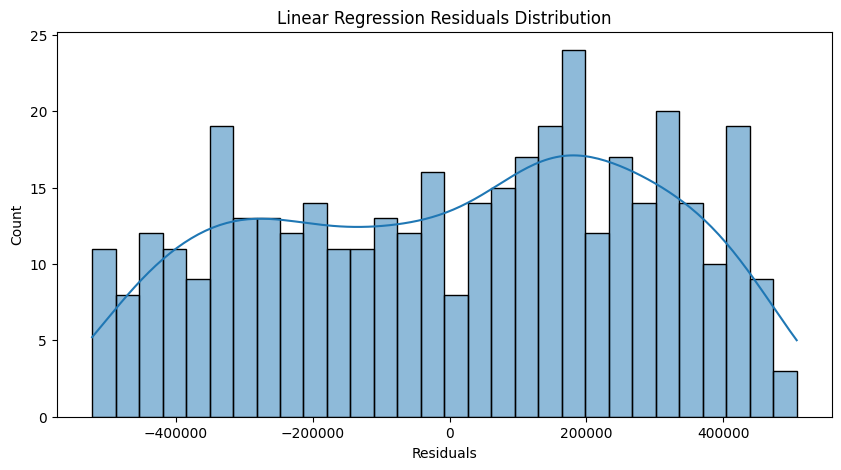

In [14]:
residuals = y_test - y_pred_lr
plt.figure(figsize=(10,5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.title("Linear Regression Residuals Distribution")
plt.show()

### Residuals vs Predicted values

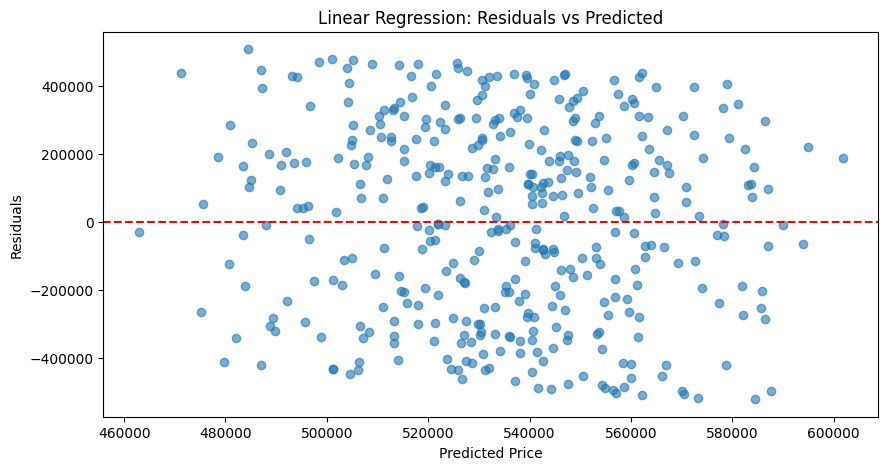

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(y_pred_lr, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Linear Regression: Residuals vs Predicted")
plt.show()

## 9. Evaluate models

In [11]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")

Linear Regression - MAE: 243241.98, RMSE: 279859.73
